## Steps :

1. Data Ingesiton

2. Eda of the data

3. processing of the data

4. model building

5. model evalution

### Data Ingestion

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Set the datetime column as the index of the dataframe.

Check the datatype of the index and convert it to datetime if necessary.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
data = pd.read_csv("TSLA.csv")

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


### Univarite timeseries

In [5]:
stock_data = data[["Date","Close"]]

In [6]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [8]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

C:\Users\shrey\AppData\Local\Temp\ipykernel_14532\1075770006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"] = pd.to_datetime(stock_data["Date"])


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [10]:
stock_data.head(2)

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001


In [11]:
stock_data = stock_data.set_index("Date")

In [12]:
stock_data.head(2)

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001


# Why we are converting date column as a index column

1. I can easily retrieve the data
2. Visualization is also simple
3. Those lib has been design in such a way it required date column as a index(scipy statsmodel)

# EDA(exploratory data analysis)

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [13]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


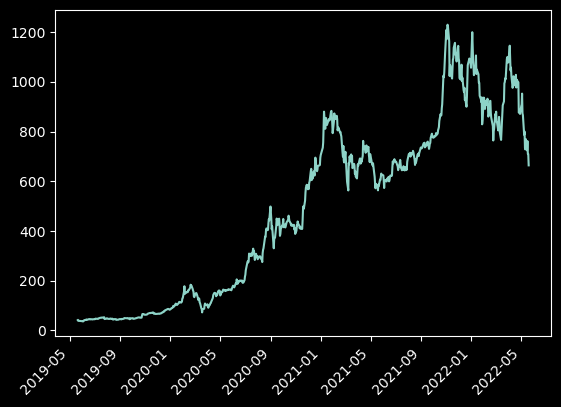

In [14]:
figure, axes = plt.subplots()

## Preventing Overlapping of the labels
figure.autofmt_xdate(rotation=45)

plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

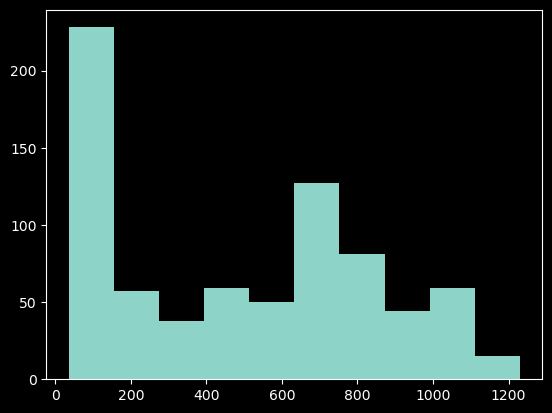

In [15]:
plt.hist(stock_data.Close)

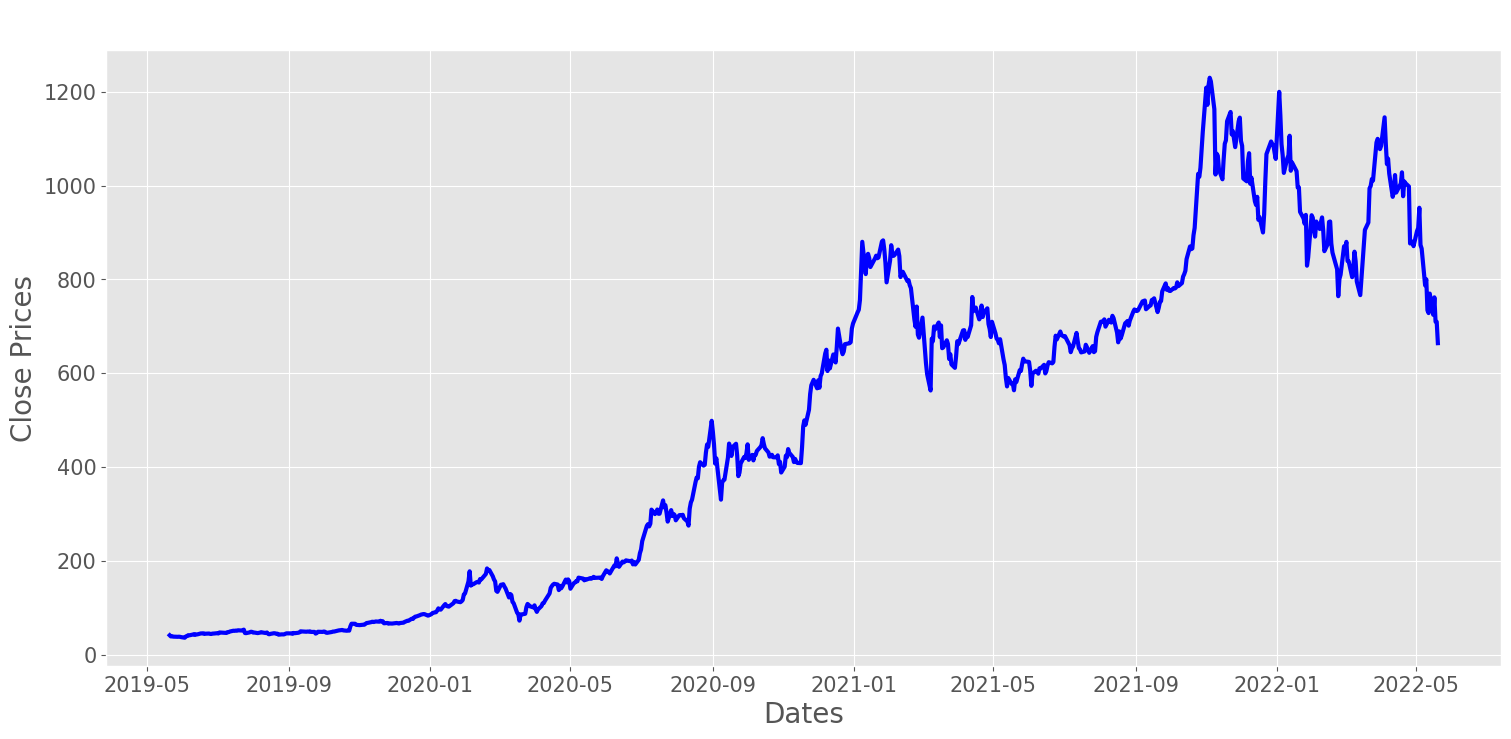

In [16]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

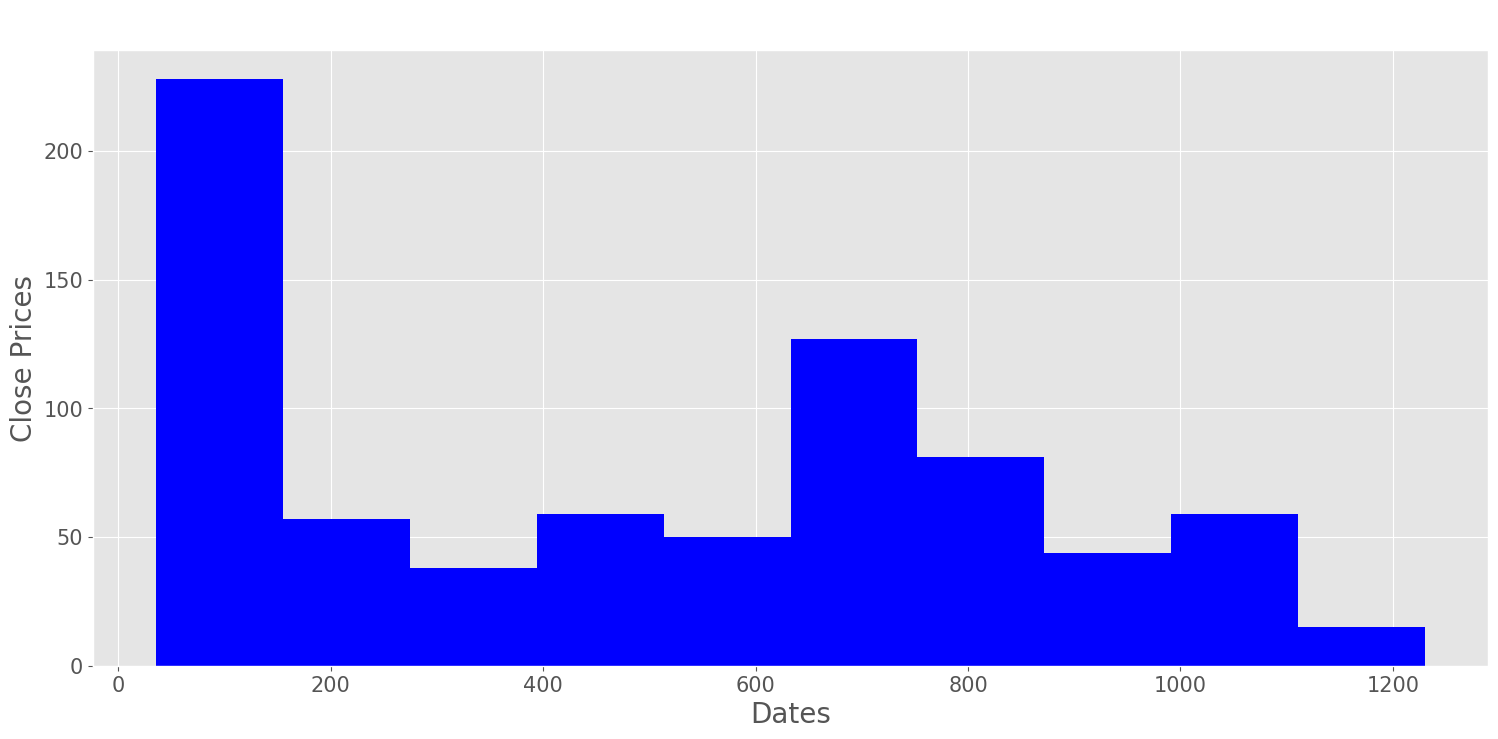

In [17]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

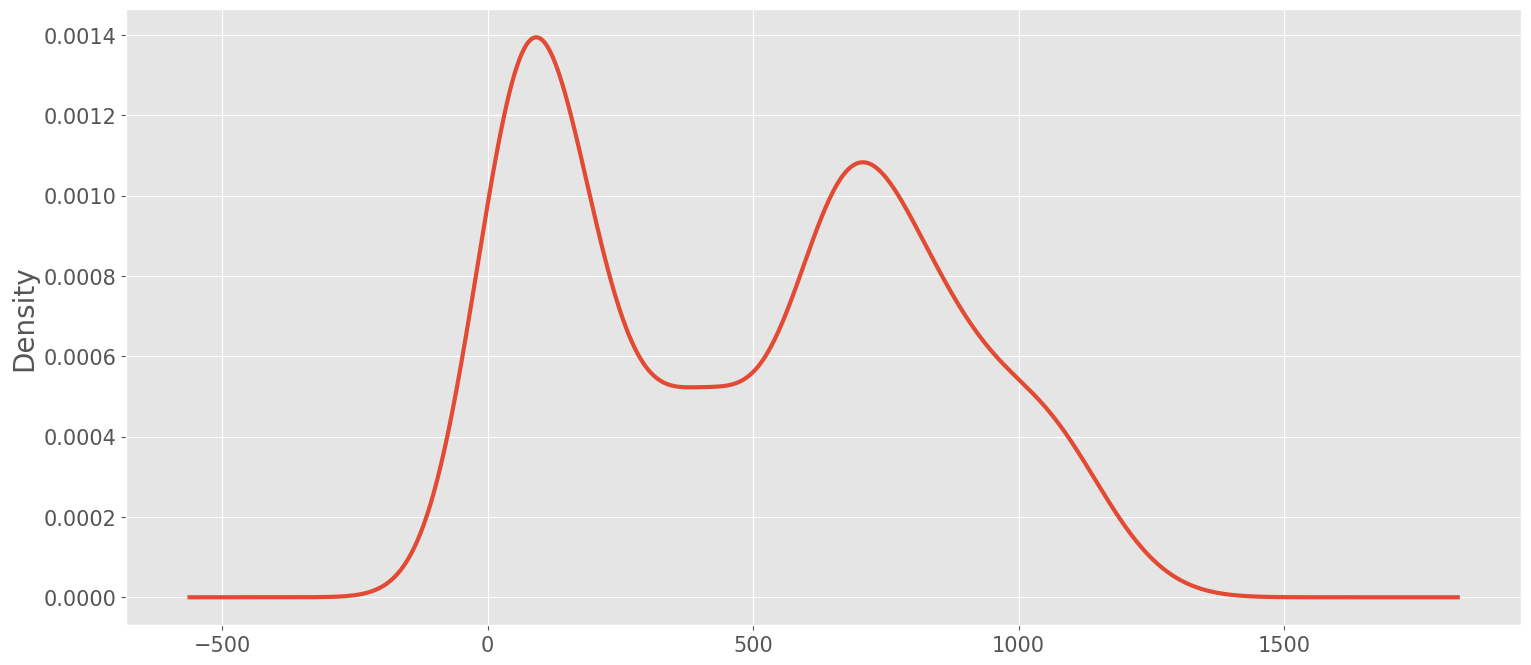

In [18]:
# Distribution of the close price
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [19]:
rolmean = stock_data["Close"].rolling(48).mean()

In [20]:
rolstd = stock_data["Close"].rolling(48).std()

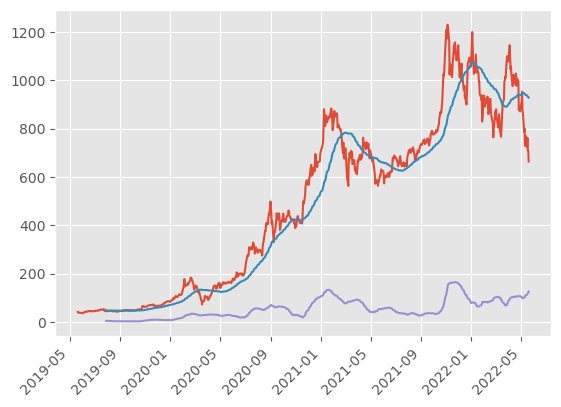

In [21]:
## Preventing Overlapping of the labels
figure, axes = plt.subplots()
figure.autofmt_xdate(rotation=45)
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [22]:
#ADF(ada fullar test)
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data["Close"])

In [23]:
pd.Series(adft[0:4], index = ["test stats","p-value","lag","data points"])

test stats      -1.363009
p-value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

In [24]:
from statsmodels.tsa.stattools import adfuller

NULL_HYPOTHESIS = "NON-STATIONARY"
ALTERNATIVE_HYPOTHESIS = "STATIONARY"

def adf_test(series):
    
    result = adfuller(series)
    
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
#Test for staionarity
def test_stationarity(timeseries):
    
    # Determine rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


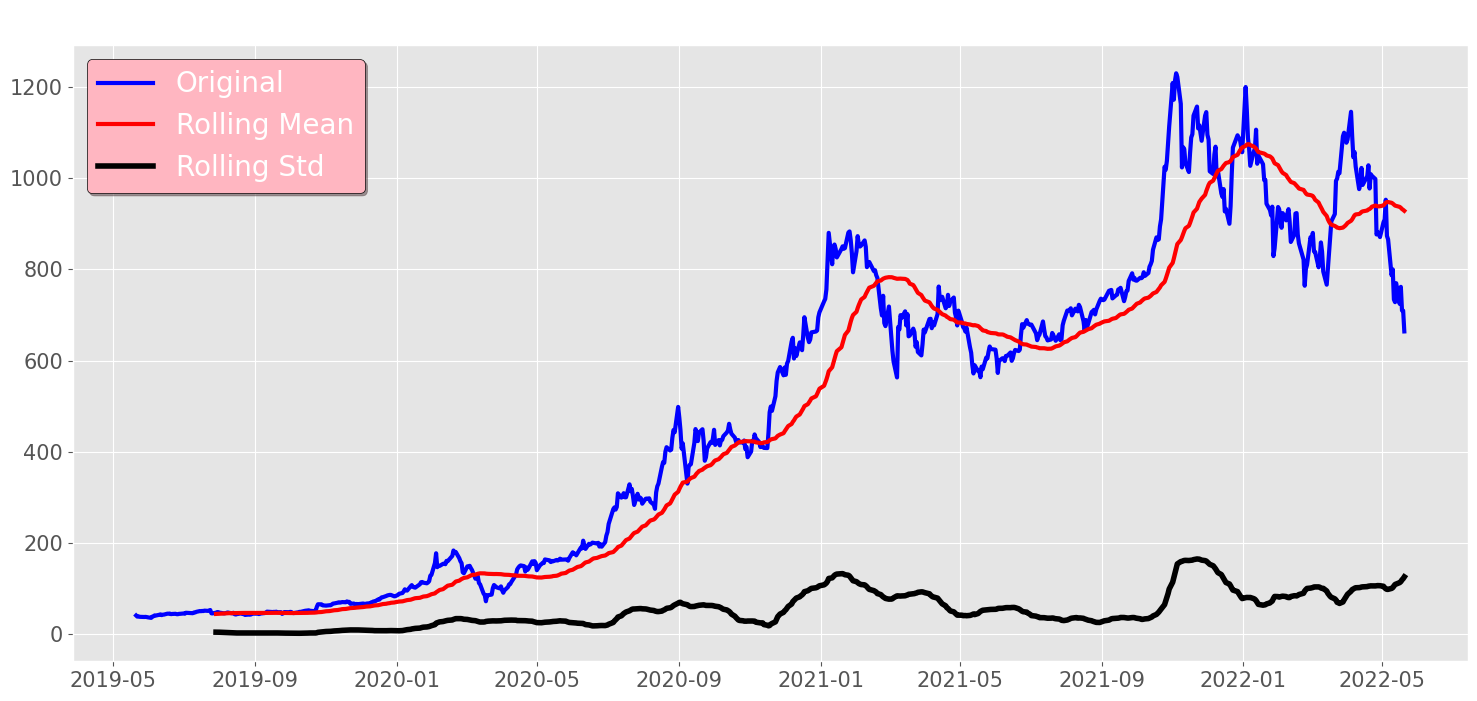

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [26]:
test_stationarity(stock_data.Close)

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[["Close"]], period=12, model="additive")

In [28]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

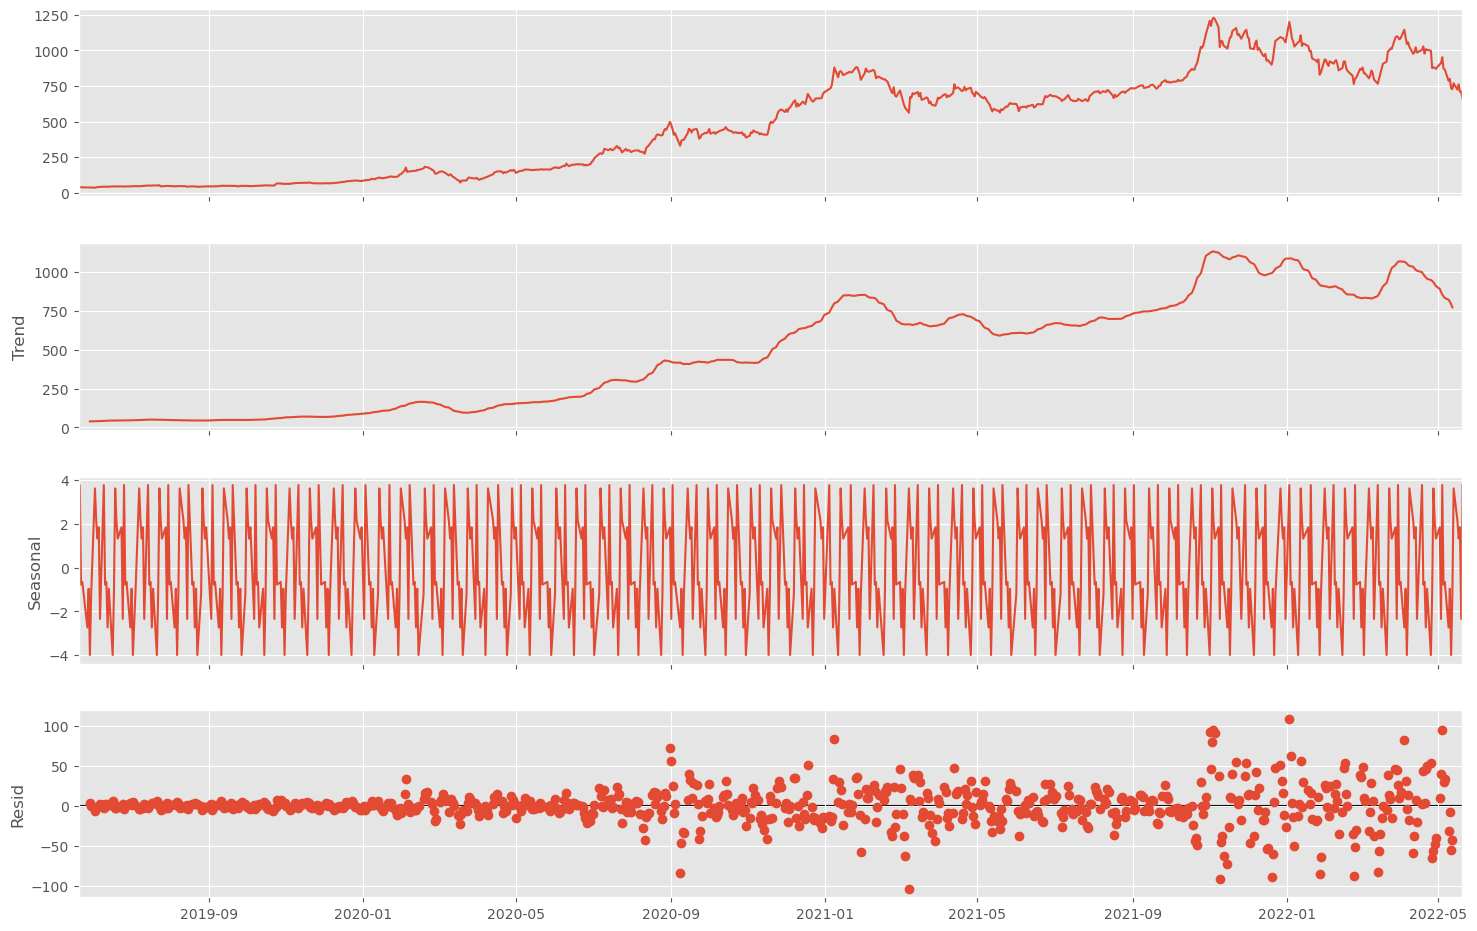

In [29]:
fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[["Close"]],period=12,model="multiplicative")

<Figure size 2000x1000 with 0 Axes>

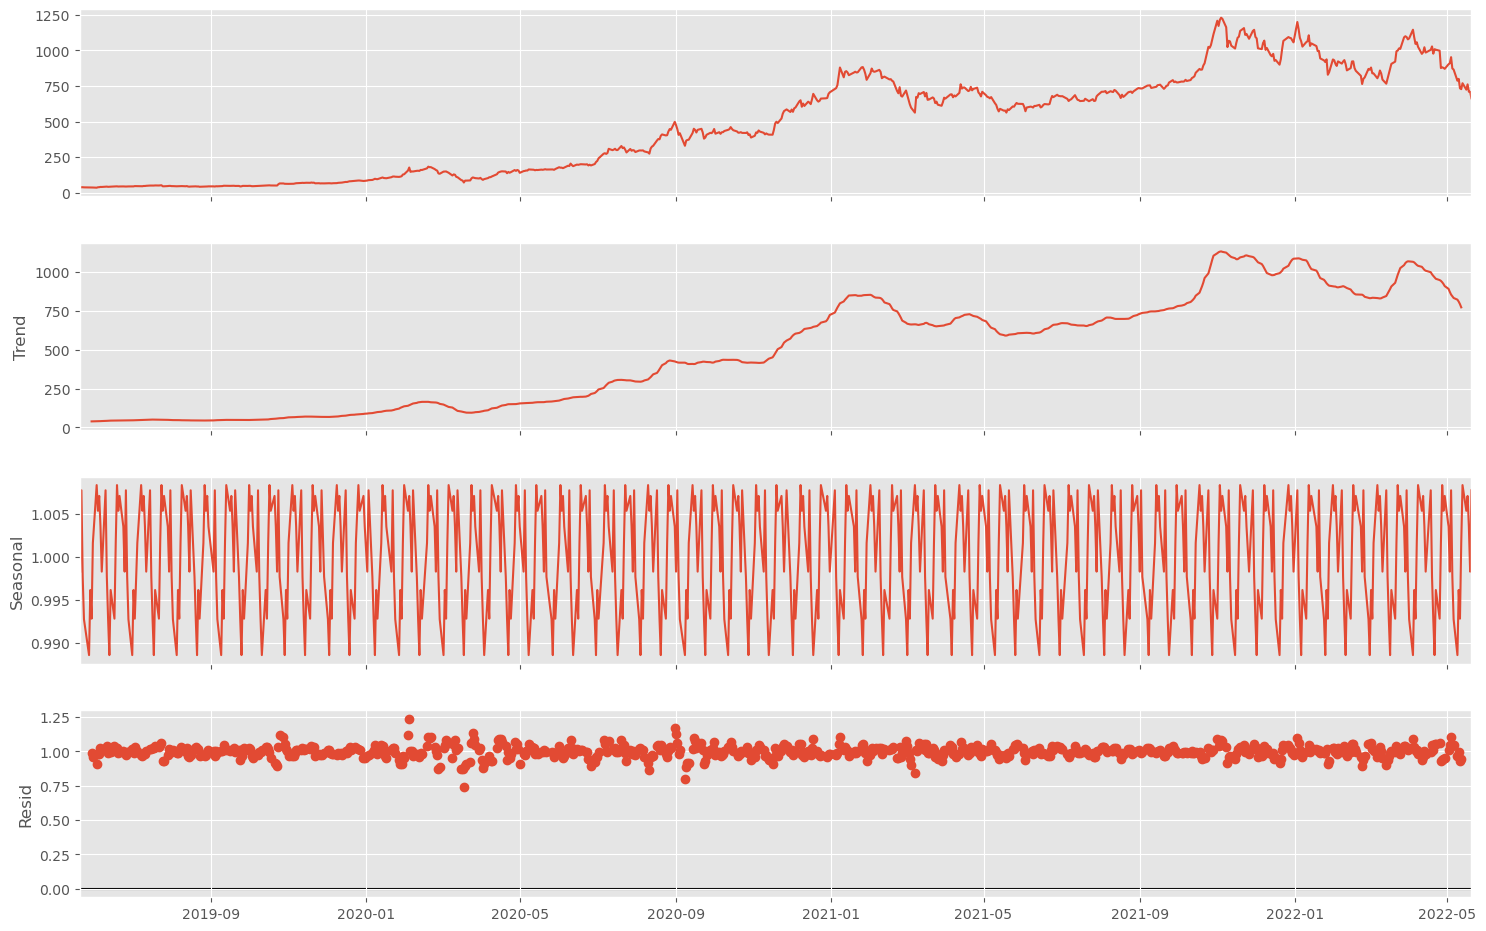

In [31]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Axes: >

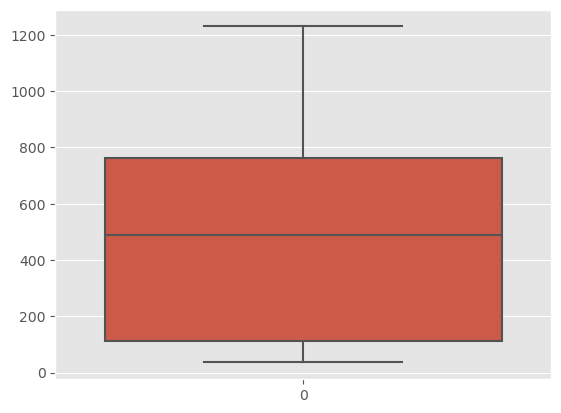

In [32]:
import seaborn as sns
sns.boxplot(stock_data.Close)

# Preprocessing of the data

1. fill the miss(here not required)
2. convert data into the stationary time series
3. if necessary then normalize the data(here not required)
4. split the data into train and test
5. clean the data by removing the outlier(here not required)l

In [33]:
df_close = stock_data['Close']
df_close.diff()

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

In [34]:
df_close = df_close.diff(10).dropna()

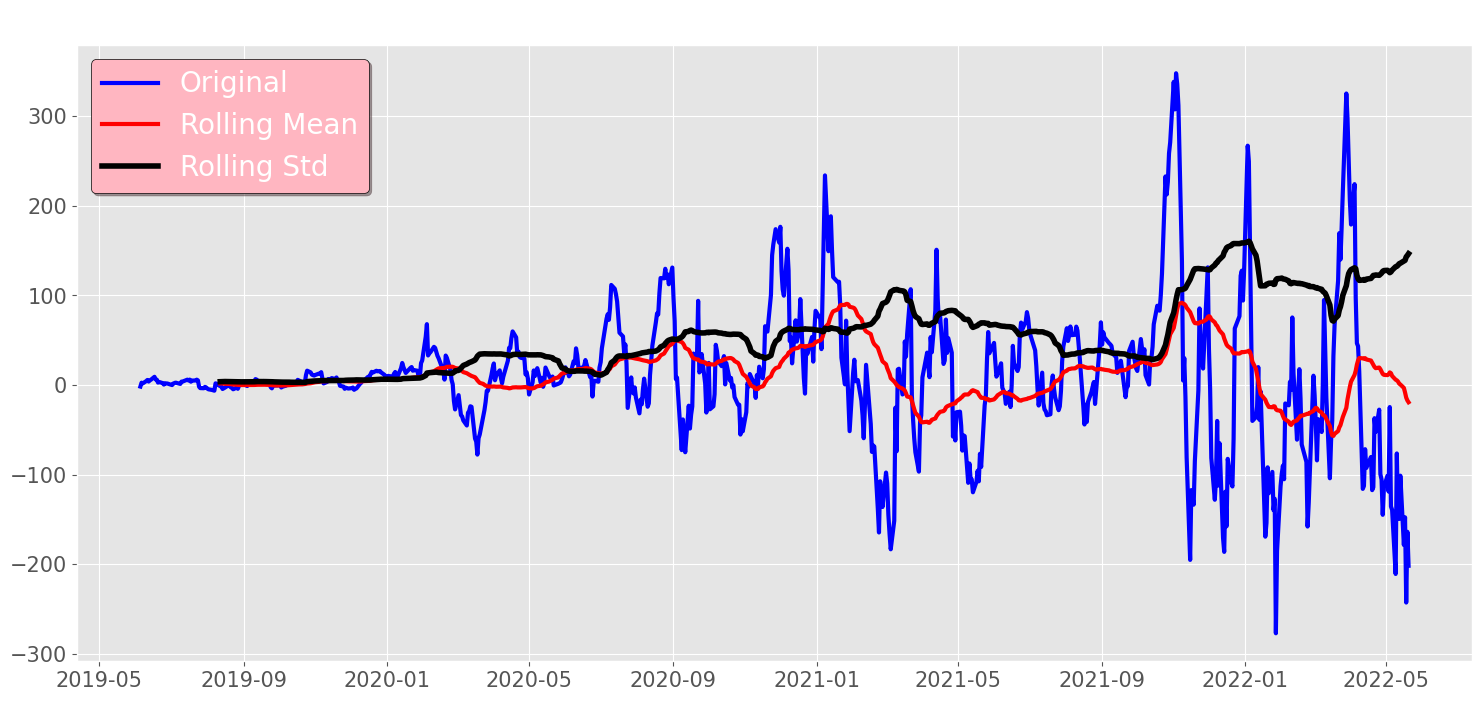

Results of dickey fuller test
Test Statistics                 -3.666313
p-value                          0.004613
No. of lags used                20.000000
Number of observations used    727.000000
critical value (1%)             -3.439377
critical value (5%)             -2.865524
critical value (10%)            -2.568891
dtype: float64


In [35]:
test_stationarity(df_close)

### Splitting the Data

In [36]:
train_data = df_close[0:-60]
test_data = df_close[-60:]

# Model Building

In [37]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
history = [x for x in train_data]

model = ARIMA(history,order=(1,1,1))
model = model.fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  688
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3346.102
Date:                Tue, 09 Jan 2024   AIC                           6698.203
Time:                        20:14:25   BIC                           6711.800
Sample:                             0   HQIC                          6703.464
                                - 688                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3036      1.657      0.183      0.855      -2.945       3.552
ma.L1         -0.3170      1.651     -0.192      0.848      -3.552       2.918
sigma2       995.5932     27.998     35.560      0.000     940.719    1050.468
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               949.84
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              38.68   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
model.forecast(), test_data[0]

(array([-131.23048859]), -94.67999267578125)

In [43]:
mean_squared_error([test_data[0]],model.forecast()),np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

(1335.938751240854, 36.55049590964333)

In [44]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [55]:
# evaluate different combinations of p, d and q v?alues for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset,test_data, p_values, d_values, q_values):
    dataset =  dataset.astype('float32')
    best_score, best_cfg = float("inf"), None

    for p in p_values:
       for d in d_values:
          for q in q_values:
            order = (p,d,q)
            try:
                # You need to add the code that fits the ARIMA model and calculates the score here
                rmse = train_arima_model(dataset, test_data, order)
                if rmse < best_score:
                    best_score, best_cfg = rmse, order
                print('ARIMA%s RMSE=%.3f' % (order,rmse))
            except:
                continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    # The function should return the best configuration and its score
    return best_cfg, best_score

In [56]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=135.788
ARIMA(0, 0, 1) RMSE=93.796
ARIMA(0, 0, 2) RMSE=73.416
ARIMA(0, 1, 0) RMSE=59.394
ARIMA(0, 1, 1) RMSE=59.282
ARIMA(0, 1, 2) RMSE=59.404
ARIMA(0, 2, 0) RMSE=90.257
ARIMA(0, 2, 1) RMSE=59.432
ARIMA(0, 2, 2) RMSE=59.332
ARIMA(1, 0, 0) RMSE=58.446
ARIMA(1, 0, 1) RMSE=58.743
ARIMA(1, 0, 2) RMSE=58.506
ARIMA(1, 1, 0) RMSE=59.275
ARIMA(1, 1, 1) RMSE=59.207
ARIMA(1, 1, 2) RMSE=59.233
ARIMA(1, 2, 0) RMSE=71.843
ARIMA(1, 2, 1) RMSE=59.326
ARIMA(1, 2, 2) RMSE=58.092
ARIMA(2, 0, 0) RMSE=58.766
ARIMA(2, 0, 1) RMSE=56.939
ARIMA(2, 0, 2) RMSE=58.839
ARIMA(2, 1, 0) RMSE=59.415
ARIMA(2, 1, 1) RMSE=60.346
ARIMA(2, 1, 2) RMSE=58.042
ARIMA(2, 2, 0) RMSE=71.866
ARIMA(2, 2, 1) RMSE=59.454
ARIMA(2, 2, 2) RMSE=57.265
Best ARIMA(2, 0, 1) RMSE=56.939


((2, 0, 1), 56.93948884732696)

In [57]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 58.76618488477879


In [61]:
predictions[0:4]

[array([-114.49535033]),
 array([-81.30431423]),
 array([16.31041906]),
 array([-9.87979982])]

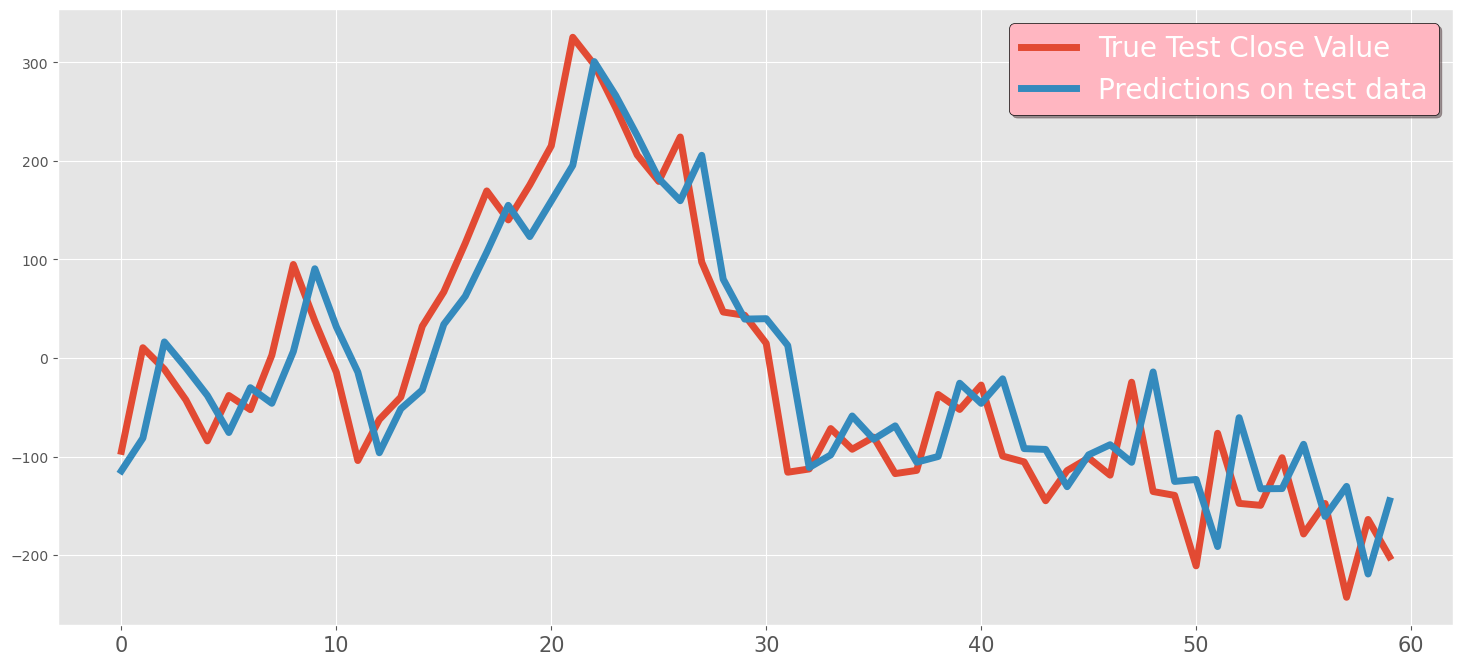

In [62]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [63]:
fc_series = pd.Series(predictions, index=test_data.index)

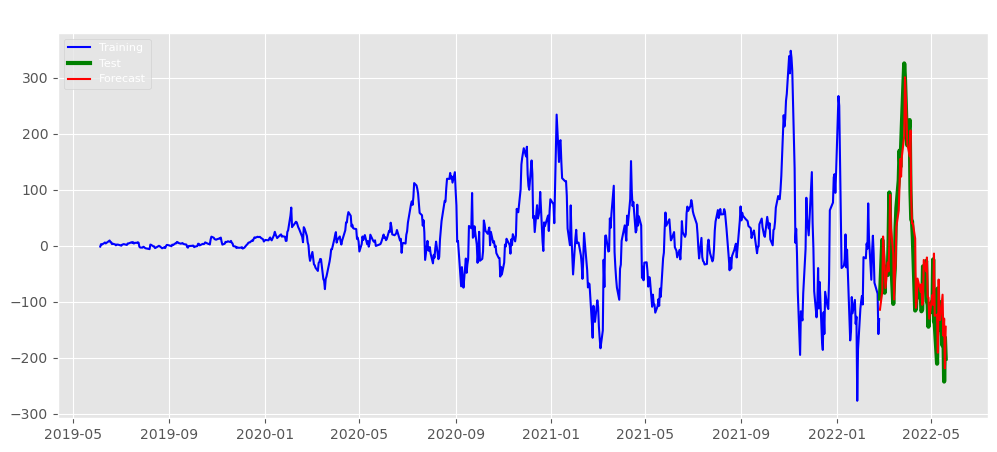

In [64]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

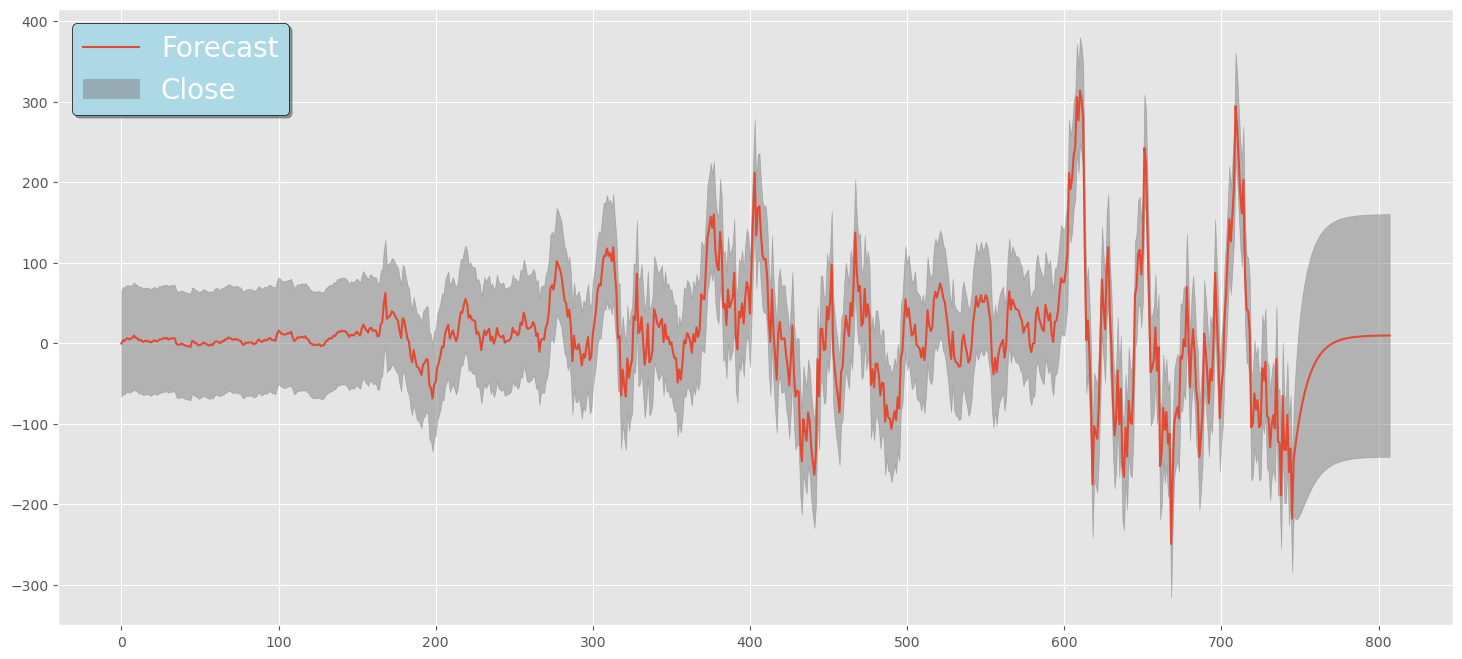

In [65]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [66]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 59.288075157672075


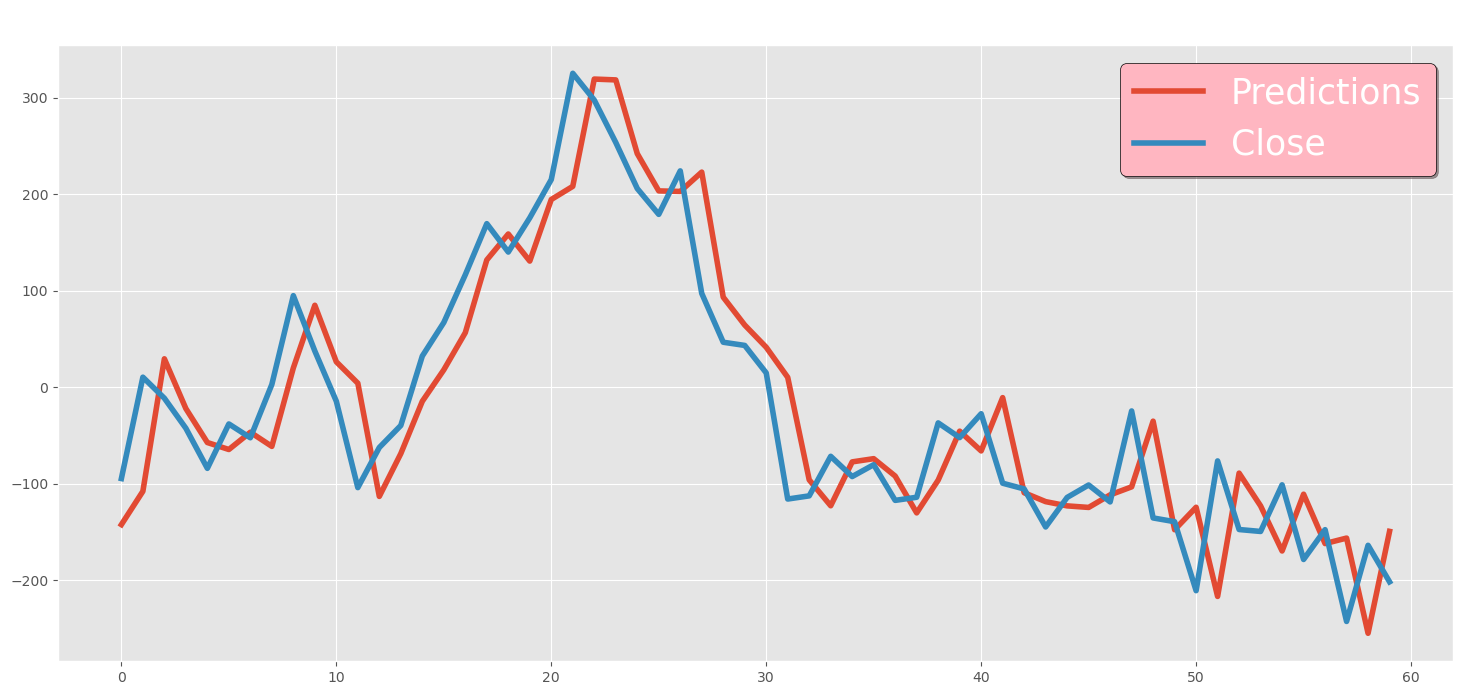

In [67]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')